In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
df = pd.read_csv("titanic_data-F.csv")
df.head(1)

,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,"St Louis, MO"


In [5]:
# replace missing values with NaN
df.replace("?", np.nan, inplace = True)
df.head(1)

,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,6,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,"New York, NY"
6,7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,"Hudson, NY"
7,8,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,"Belfast, NI"
8,9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,"Bayside, Queens, NY"
9,10,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C,"Montevideo, Uruguay"


In [ ]:
# check for missing values
print(df.isna().sum())

x               0
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
home.dest     564
dtype: int64


In [ ]:
df.drop(['cabin' , 'home.dest', 'name', 'ticket'] ,inplace = True , axis = 1)
df

,x,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,female,29,0,0,211.3375,S
1,2,1,1,male,0.9167,1,2,151.55,S
2,3,1,0,female,2,1,2,151.55,S
3,4,1,0,male,30,1,2,151.55,S
4,5,1,0,female,25,1,2,151.55,S
...,...,...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5,1,0,14.4542,C
1305,1306,3,0,female,NaN,1,0,14.4542,C
1306,1307,3,0,male,26.5,0,0,7.225,C
1307,1308,3,0,male,27,0,0,7.225,C


In [ ]:
# check for missing values
print(df.isna().sum())

x             0
pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64


In [ ]:
# here 0 is for female and 1 is for male
label_encoder = preprocessing.LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df.head(10)

,x,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,0,29,0,0,211.3375,S
1,2,1,1,1,0.9167,1,2,151.55,S
2,3,1,0,0,2,1,2,151.55,S
3,4,1,0,1,30,1,2,151.55,S
4,5,1,0,0,25,1,2,151.55,S
5,6,1,1,1,48,0,0,26.55,S
6,7,1,1,0,63,1,0,77.9583,S
7,8,1,0,1,39,0,0,0,S
8,9,1,1,0,53,2,0,51.4792,S
9,10,1,0,1,71,0,0,49.5042,C


In [ ]:
# here 2 is for S, 0 is for C and 1 is for Q
label_encoder = preprocessing.LabelEncoder()
df['embarked'] = label_encoder.fit_transform(df['embarked'])
df.head(10)

,x,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,0,29,0,0,211.3375,2
1,2,1,1,1,0.9167,1,2,151.55,2
2,3,1,0,0,2,1,2,151.55,2
3,4,1,0,1,30,1,2,151.55,2
4,5,1,0,0,25,1,2,151.55,2
5,6,1,1,1,48,0,0,26.55,2
6,7,1,1,0,63,1,0,77.9583,2
7,8,1,0,1,39,0,0,0,2
8,9,1,1,0,53,2,0,51.4792,2
9,10,1,0,1,71,0,0,49.5042,0


In [ ]:
df = df.dropna()
df

,x,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,0,29,0,0,211.3375,2
1,2,1,1,1,0.9167,1,2,151.55,2
2,3,1,0,0,2,1,2,151.55,2
3,4,1,0,1,30,1,2,151.55,2
4,5,1,0,0,25,1,2,151.55,2
...,...,...,...,...,...,...,...,...,...
1301,1302,3,0,1,45.5,0,0,7.225,0
1304,1305,3,0,0,14.5,1,0,14.4542,0
1306,1307,3,0,1,26.5,0,0,7.225,0
1307,1308,3,0,1,27,0,0,7.225,0


In [ ]:
# check for missing values
print(df.isna().sum())

x           0
pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


In [ ]:
X = df.drop("survived",axis=1)
X.head()

,x,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29,0,0,211.3375,2
1,2,1,1,0.9167,1,2,151.55,2
2,3,1,0,2,1,2,151.55,2
3,4,1,1,30,1,2,151.55,2
4,5,1,0,25,1,2,151.55,2


In [ ]:
# returns description of the data in the data frame
#computes and displays summary statistics for a dataframe
df.describe()


,x,pclass,survived,sex,sibsp,parch,embarked
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,599.617225,2.206699,0.408612,0.628708,0.503349,0.421053,1.548325
std,364.317186,0.841542,0.491813,0.483382,0.912471,0.840052,0.811088
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,575.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,874.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1309.000000,3.000000,1.000000,1.000000,8.000000,6.000000,3.000000


In [ ]:
y = df["survived"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Displays the splitted data count
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Testing dataset shape:", X_test.shape, y_test.shape)

Training dataset shape: (836, 8) (836,)
Testing dataset shape: (209, 8) (209,)


Accuracy: 0.7751196172248804
Confusion matrix:
 [[103  24]
 [ 23  59]]


Text(69.0, 0.5, 'Actual')

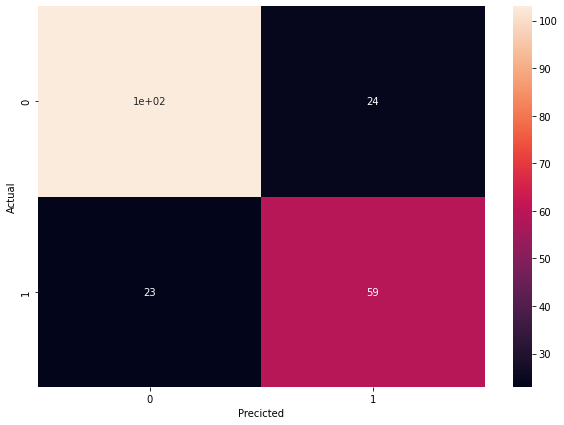

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.model_selection import train_test_split
import seaborn as sns

clf = DecisionTreeClassifier(random_state=42) 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)) 
cm=confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Precicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.0, 0.0, 1.0, ..., 0, 0, '211.3375'],
       [0.0, 0.0, 1.0, ..., 1, 2, '151.55'],
       [0.0, 0.0, 1.0, ..., 1, 2, '151.55'],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 0, '7.225'],
       [1.0, 0.0, 0.0, ..., 0, 0, '7.225'],
       [0.0, 0.0, 1.0, ..., 0, 0, '7.875']], dtype=object)

In [ ]:
#the process of converting raw data into a a format or structure
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,1.0,0.0,1,1,0,29,0,0,211.3375
1,0.0,0.0,1.0,0.0,2,1,1,0.9167,1,2,151.55
2,0.0,0.0,1.0,0.0,3,1,0,2,1,2,151.55
3,0.0,0.0,1.0,0.0,4,1,1,30,1,2,151.55
4,0.0,0.0,1.0,0.0,5,1,0,25,1,2,151.55
...,...,...,...,...,...,...,...,...,...,...,...
1040,1.0,0.0,0.0,0.0,1302,3,1,45.5,0,0,7.225
1041,1.0,0.0,0.0,0.0,1305,3,0,14.5,1,0,14.4542
1042,1.0,0.0,0.0,0.0,1307,3,1,26.5,0,0,7.225
1043,1.0,0.0,0.0,0.0,1308,3,1,27,0,0,7.225


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y,
                                                    test_size=0.2)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print("Prediction: ",y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Prediction:  [0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0]
Accuracy: 0.7272727272727273
Confusion matrix:
 [[96 35]
 [22 56]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Classifier metrics on the test set
Accuracy: 72.73%
Precision: 0.6153846153846154
Recall: 0.717948717948718
F1: 0.6627218934911242


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.4973958333333333, 0.9166666666666666, 'x[6] <= 0.5\ngini = 0.486\nsamples = 836\nvalue = [487, 349]'),
 Text(0.2604166666666667, 0.75, 'x[4] <= 623.0\ngini = 0.354\nsamples = 313\nvalue = [72, 241]'),
 Text(0.11458333333333333, 0.5833333333333334, 'x[10] <= 26.125\ngini = 0.09\nsamples = 191\nvalue = [9, 182]'),
 Text(0.0625, 0.4166666666666667, 'x[7] <= 56.0\ngini = 0.209\nsamples = 59\nvalue = [7, 52]'),
 Text(0.041666666666666664, 0.25, 'x[4] <= 479.5\ngini = 0.185\nsamples = 58\nvalue = [6, 52]'),
 Text(0.020833333333333332, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.0625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[7] <= 62.5\ngini = 0.03\nsamples = 132\nvalue = [2, 130]'),
 Text(0.125, 0.25, 'x[10] <= 32.09\ngini = 0.016\nsamples = 127\nvalue = [1, 126]'),
 Text(0.10416666666666667, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.14583333333333334, 

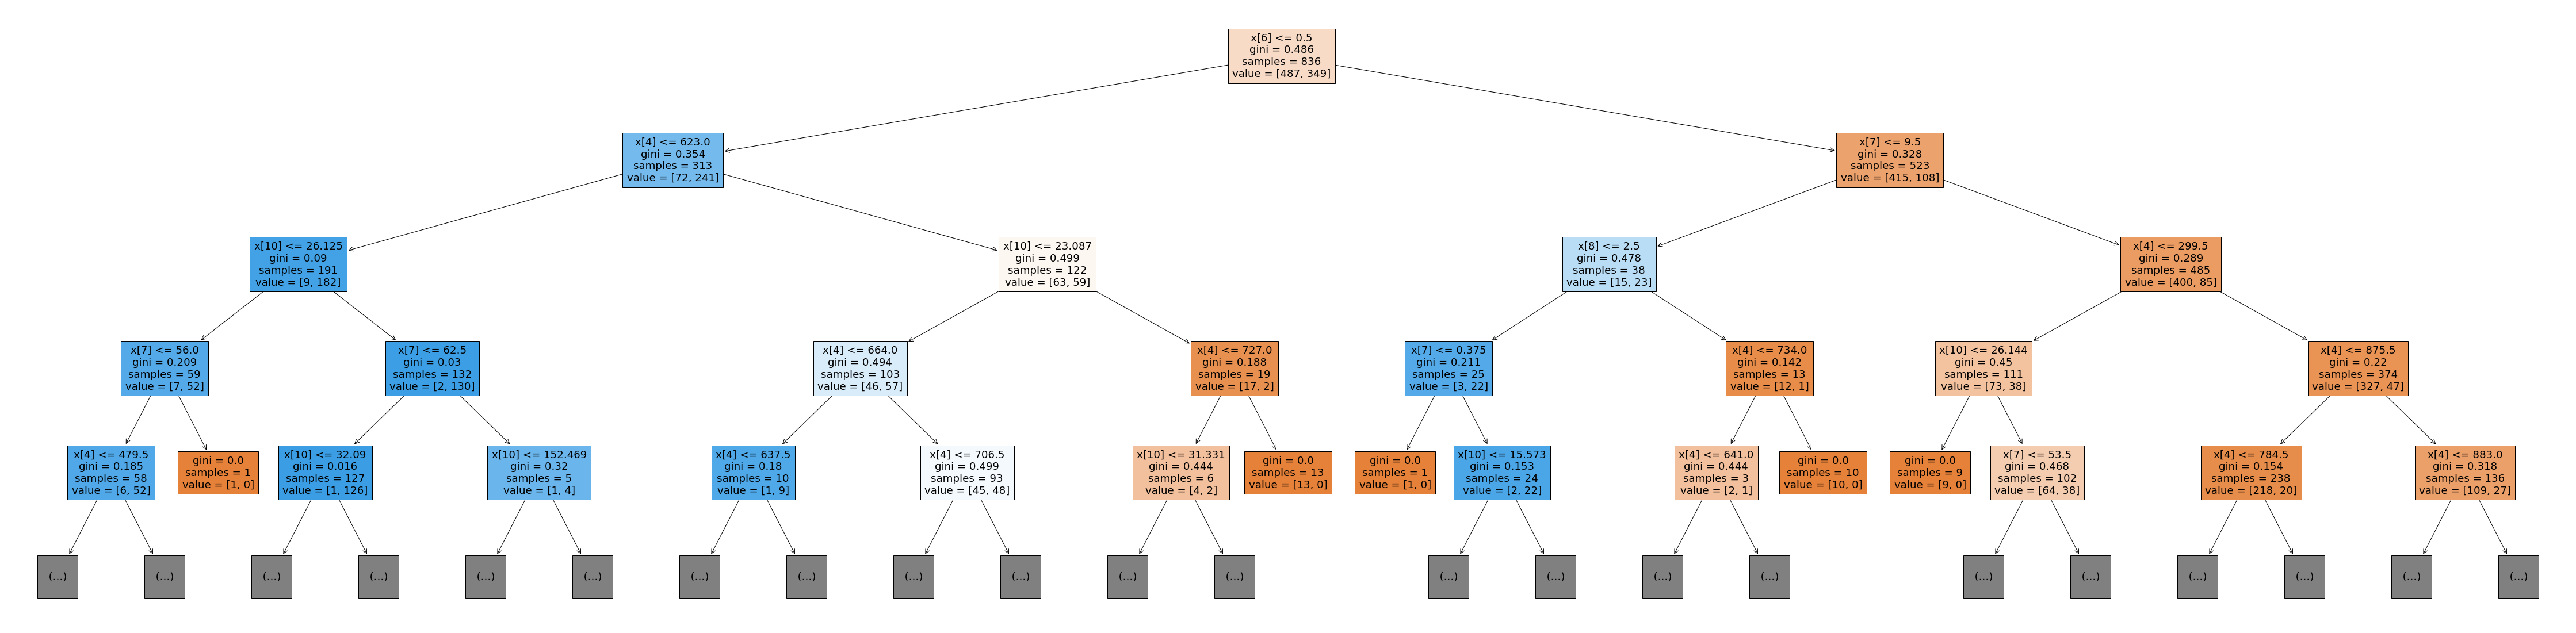

In [ ]:
# Plot the decision tree
#plt.figure(figsize=(20,10))
#plot_tree(clf, filled=True, rounded=True, feature_names=X.columns, class_names=['survived']plt.show()
from sklearn.tree import plot_tree
plt.figure(figsize =(80,20))
plot_tree(clf,max_depth=4, filled=True)

In [ ]:
count = clf.tree_
print(count.node_count)

341


In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       131
           1       0.62      0.72      0.66        78

    accuracy                           0.73       209
   macro avg       0.71      0.73      0.72       209
weighted avg       0.74      0.73      0.73       209



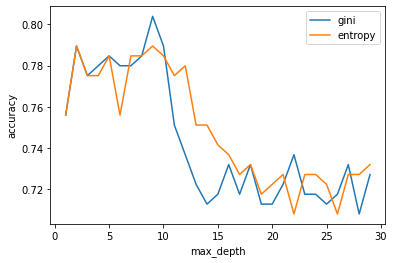

In [ ]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

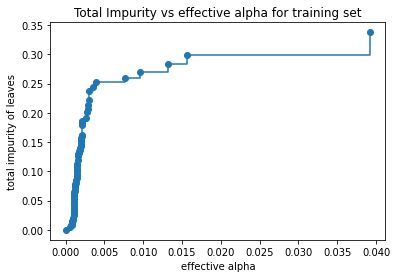

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ["gini","entropy", "log_loss"],  
              'splitter': ["best", "random"], 
              'max_depth':range(1,10)}  
   
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       131
           1       0.71      0.68      0.69        78

    accuracy                           0.78       209
   macro avg       0.76      0.76      0.76       209
weighted avg       0.77      0.78      0.77       209

